## デルタ法

デルタ法（Delta Method）は、推定量の関数の漸近的な分布を導くための手法です。これは、推定量が大標本のときに正規分布に従うという特性を利用し、その関数もまた漸近的に正規分布に従うことを示します。デルタ法は、主に統計学において推定値の分布やその標準誤差を求める際に使用されます。

### 基本概念

デルタ法は、以下のように定式化されます。

1. 確率変数 $X_n$ が $X$ に対して次の条件を満たすとします。
   $$
   \sqrt{n}(X_n - \theta) \xrightarrow{d} N(0, \sigma^2)
   $$

2. $g$ が $\theta$ の周りで微分可能な関数であるとします。このとき、関数 $g(X_n)$ の漸近分布は次のように得られます。
   $$
   \sqrt{n}(g(X_n) - g(\theta)) \xrightarrow{d} N(0, [g'(\theta)]^2 \sigma^2)
   $$

ここで、$g'(\theta)$ は $g$ の $\theta$ における一階微分です。

### 直感的な理解

デルタ法の基本的なアイデアは、関数 $g$ のテイラー展開を利用して、$X_n$ の変動が $g(X_n)$ にどのように影響するかを解析することです。具体的には、$X_n$ の小さな変動が $g(X_n)$ に与える影響を一次の微分 $g'(\theta)$ で近似します。

### 具体例

#### 例1: 標本平均の関数

標本平均 $\bar{X}$ が母平均 $\mu$ に対して次のように正規分布に収束する場合を考えます。
$$
\sqrt{n}(\bar{X} - \mu) \xrightarrow{d} N(0, \sigma^2)
$$

関数 $g(x) = x^2$ を考えた場合、$\bar{X}^2$ の漸近分布を求めます。

1. $g'(\mu) = 2\mu$
2. デルタ法を適用すると、次のようになります。
   $$
   \sqrt{n}(\bar{X}^2 - \mu^2) \xrightarrow{d} N(0, 4\mu^2 \sigma^2)
   $$

#### Python を用いたシミュレーション

以下のPythonコードは、デルタ法を使ったシミュレーションの例です。


### 結論

デルタ法は、推定量の関数の漸近分布を求めるための有力な手法です。特に、大標本理論に基づく統計解析において、その有用性は非常に高いです。この方法を用いることで、複雑な関数の漸近分布も比較的容易に解析できるようになります。

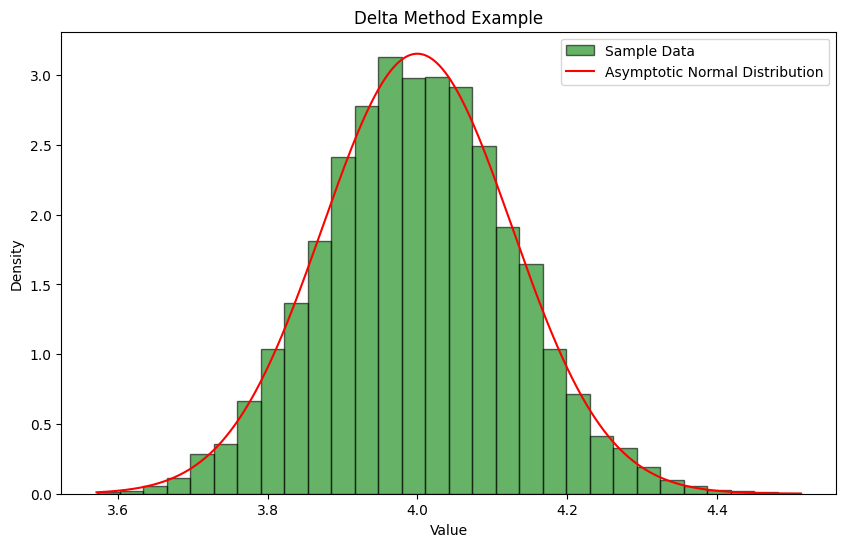

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# 母平均と母分散
mu = 2
sigma = 1

# 標本数
n = 1000
num_samples = 10000

# 標本平均を生成
samples = np.random.normal(loc=mu, scale=sigma, size=(num_samples, n))
sample_means = np.mean(samples, axis=1)

# 関数 g(x) = x^2 を適用
g_sample_means = sample_means**2

# 理論的な漸近分布のパラメータ
asymptotic_mean = mu**2
asymptotic_std = np.sqrt((4 * mu**2 * sigma**2) / n)

# プロット
plt.figure(figsize=(10, 6))
plt.hist(g_sample_means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Sample Data')

# 理論的な正規分布をプロット
x = np.linspace(min(g_sample_means), max(g_sample_means), 1000)
plt.plot(x, (1/(asymptotic_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - asymptotic_mean) / asymptotic_std)**2), 'r-', label='Asymptotic Normal Distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Delta Method Example')
plt.show()